In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

## Getting Data

In [399]:
#read zillow properties 
df_zillow = pd.read_csv('/Users/hp/Projects/zillow/Zillow/sanjose_properties.csv')
# read earthquake hazard data
df_cgs = pd.read_csv('/Users/hp/Projects/datamerge/SanJose_hazard_cgs.csv')

In [400]:
df_zillow.head()

,latitude,longitude,address,city,state,zip,bedrooms,bathrooms,sqft,lot_size,year_built,price/sqft,price,sale_type,zestimate,date_sold,days_on_zillow,house_type,url
0,37.373702,-121.833969,4014 Shanj Ct,San Jose,CA,95127,2.0,1.5,1042.0,1026.0,1989.0,427.0,442787,sold,536057.0,2/5/19,33.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...
1,37.315415,-121.827198,1492 La Boheme St,SAN JOSE,CA,95121,2.0,2.0,988.0,757.0,1970.0,475.0,468888,sale,477573.0,NaN,94.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...
2,37.315415,-121.827198,1492 La Boheme St,SAN JOSE,CA,95121,2.0,2.0,988.0,757.0,1970.0,475.0,468888,sale,477573.0,NaN,94.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...
3,37.315415,-121.827198,1492 La Boheme St,SAN JOSE,CA,95121,2.0,2.0,988.0,757.0,1970.0,475.0,468888,sale,477573.0,NaN,94.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...
4,37.315415,-121.827198,1492 La Boheme St,SAN JOSE,CA,95121,2.0,2.0,988.0,757.0,1970.0,475.0,468888,sale,477573.0,NaN,94.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...


In [401]:
df_zillow.shape

(14365, 19)

In [402]:
df_zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14365 entries, 0 to 14364
Data columns (total 19 columns):
latitude          14365 non-null float64
longitude         14365 non-null float64
address           14365 non-null object
city              14365 non-null object
state             14365 non-null object
zip               14365 non-null int64
bedrooms          14360 non-null float64
bathrooms         14283 non-null float64
sqft              14305 non-null float64
lot_size          14060 non-null float64
year_built        14177 non-null float64
price/sqft        14073 non-null float64
price             14143 non-null object
sale_type         14365 non-null object
zestimate         14098 non-null float64
date_sold         13400 non-null object
days_on_zillow    943 non-null float64
house_type        14365 non-null object
url               14365 non-null object
dtypes: float64(10), int64(1), object(8)
memory usage: 2.1+ MB


In [403]:
df_zillow.columns

Index(['latitude', 'longitude', 'address', 'city', 'state', 'zip', 'bedrooms',
       'bathrooms', 'sqft', 'lot_size', 'year_built', 'price/sqft', 'price',
       'sale_type', 'zestimate', 'date_sold', 'days_on_zillow', 'house_type',
       'url'],
      dtype='object')

In [404]:
df_cgs.head()

,Parcel_Number,Object_id,address,City,Liquefaction,Landslide,Faultzone
0,25939113,2721725,1 ALMADEN BLVD,SAN JOSE,1.0,0.0,0
1,59931054,2633659,1 BAY TREE LN,SAN JOSE,0.0,1.0,0
2,48419065,2711076,1 BIRCH LN,SAN JOSE,0.0,0.0,0
3,48418064,2711143,1 CEDAR LN,SAN JOSE,0.0,0.0,0
4,45505017,2734876,1 CURTNER AVE,SAN JOSE,1.0,0.0,0


In [405]:
df_cgs.shape

(260988, 7)

In [406]:
df_cgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260988 entries, 0 to 260987
Data columns (total 7 columns):
Parcel_Number    260988 non-null int64
Object_id        260988 non-null int64
address          260988 non-null object
City             260988 non-null object
Liquefaction     260499 non-null float64
Landslide        260499 non-null float64
Faultzone        260988 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 13.9+ MB


In [407]:
# chane address column in zillow properties to upper to match earthquake hazard data
df_zillow['address'] = df_zillow['address'].str.upper()
df_zillow['city'] = df_zillow['city'].str.upper()

In [408]:
#merge zillow propertis and cgs hazard data based on 'address' column
df_merge = pd.merge(df_zillow, df_cgs, on='address')

In [409]:
# Non merged data of Zillow
df_nonmerged_zillow = df_zillow[~df_zillow.address.isin(df_merge.address)]
#df_nonmerged_zillow.to_csv('/Users/hp/Projects/zillow/Zillow/nonmerged_zillow.csv')
df_nonmerged_zillow.shape

(563, 19)

In [410]:
df_merge.head()

,latitude,longitude,address,city,state,zip,bedrooms,bathrooms,sqft,lot_size,...,date_sold,days_on_zillow,house_type,url,Parcel_Number,Object_id,City,Liquefaction,Landslide,Faultzone
0,37.373702,-121.833969,4014 SHANJ CT,SAN JOSE,CA,95127,2.0,1.5,1042.0,1026.0,...,2/5/19,33.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...,60103089,2640149,SAN JOSE,0.0,0.0,0
1,37.315415,-121.827198,1492 LA BOHEME ST,SAN JOSE,CA,95121,2.0,2.0,988.0,757.0,...,NaN,94.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...,67003020,2744490,SAN JOSE,1.0,0.0,0
2,37.315415,-121.827198,1492 LA BOHEME ST,SAN JOSE,CA,95121,2.0,2.0,988.0,757.0,...,NaN,94.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...,67003020,2744490,SAN JOSE,1.0,0.0,0
3,37.315415,-121.827198,1492 LA BOHEME ST,SAN JOSE,CA,95121,2.0,2.0,988.0,757.0,...,NaN,94.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...,67003020,2744490,SAN JOSE,1.0,0.0,0
4,37.315415,-121.827198,1492 LA BOHEME ST,SAN JOSE,CA,95121,2.0,2.0,988.0,757.0,...,NaN,94.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...,67003020,2744490,SAN JOSE,1.0,0.0,0


In [411]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13940 entries, 0 to 13939
Data columns (total 25 columns):
latitude          13940 non-null float64
longitude         13940 non-null float64
address           13940 non-null object
city              13940 non-null object
state             13940 non-null object
zip               13940 non-null int64
bedrooms          13933 non-null float64
bathrooms         13878 non-null float64
sqft              13896 non-null float64
lot_size          13881 non-null float64
year_built        13881 non-null float64
price/sqft        13875 non-null float64
price             13928 non-null object
sale_type         13940 non-null object
zestimate         13909 non-null float64
date_sold         13271 non-null object
days_on_zillow    667 non-null float64
house_type        13940 non-null object
url               13940 non-null object
Parcel_Number     13940 non-null int64
Object_id         13940 non-null int64
City              13940 non-null object
Liquef

In [412]:
#remove object_id and city column fom merged dataframe
df_merge=df_merge.drop(['Object_id','City'],axis=1)

In [413]:
df_merge.columns

Index(['latitude', 'longitude', 'address', 'city', 'state', 'zip', 'bedrooms',
       'bathrooms', 'sqft', 'lot_size', 'year_built', 'price/sqft', 'price',
       'sale_type', 'zestimate', 'date_sold', 'days_on_zillow', 'house_type',
       'url', 'Parcel_Number', 'Liquefaction', 'Landslide', 'Faultzone'],
      dtype='object')

In [414]:
# Adding 'fire hazard' column
df_merge['fire_hazard'] = df_merge.apply(lambda _: '0', axis=1)

In [415]:
df_merge.columns

Index(['latitude', 'longitude', 'address', 'city', 'state', 'zip', 'bedrooms',
       'bathrooms', 'sqft', 'lot_size', 'year_built', 'price/sqft', 'price',
       'sale_type', 'zestimate', 'date_sold', 'days_on_zillow', 'house_type',
       'url', 'Parcel_Number', 'Liquefaction', 'Landslide', 'Faultzone',
       'fire_hazard'],
      dtype='object')

In [416]:
df_merge.shape

(13940, 24)

In [417]:
df_merge.head()

,latitude,longitude,address,city,state,zip,bedrooms,bathrooms,sqft,lot_size,...,zestimate,date_sold,days_on_zillow,house_type,url,Parcel_Number,Liquefaction,Landslide,Faultzone,fire_hazard
0,37.373702,-121.833969,4014 SHANJ CT,SAN JOSE,CA,95127,2.0,1.5,1042.0,1026.0,...,536057.0,2/5/19,33.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...,60103089,0.0,0.0,0,0
1,37.315415,-121.827198,1492 LA BOHEME ST,SAN JOSE,CA,95121,2.0,2.0,988.0,757.0,...,477573.0,NaN,94.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...,67003020,1.0,0.0,0,0
2,37.315415,-121.827198,1492 LA BOHEME ST,SAN JOSE,CA,95121,2.0,2.0,988.0,757.0,...,477573.0,NaN,94.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...,67003020,1.0,0.0,0,0
3,37.315415,-121.827198,1492 LA BOHEME ST,SAN JOSE,CA,95121,2.0,2.0,988.0,757.0,...,477573.0,NaN,94.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...,67003020,1.0,0.0,0,0
4,37.315415,-121.827198,1492 LA BOHEME ST,SAN JOSE,CA,95121,2.0,2.0,988.0,757.0,...,477573.0,NaN,94.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...,67003020,1.0,0.0,0,0


In [418]:
#reading fire hazard data
df_fire = pd.read_csv('/Users/hp/Projects/fire_hazard/FHZ_sanjose.csv')


In [419]:
df_fire.head()

,latitude,longitude,address,city,state,zip,bedrooms,bathrooms,sqft,lot_size,year_built,price/sqft,price,sale_type,zestimate,date_sold,days_on_zillow,house_type,url,fire_hazard
0,37.392765,-121.807402,87 La Quinta Dr,San Jose,CA,95127,2,2.5,1781,1975,1980,NaN,NaN,off_market,790240,NaN,NaN,townhouse,NaN,1
1,37.392705,-121.807453,89 La Quinta Dr,San Jose,CA,95127,3,2.5,1781,2500,1980,NaN,NaN,off_market,788851,NaN,NaN,townhouse,NaN,1
2,37.392634,-121.807489,91 La Quinta Dr,San Jose,CA,95127,3,2.0,1703,2184,1980,NaN,NaN,off_market,783220,NaN,NaN,townhouse,NaN,1
3,37.392557,-121.807535,93 La Quinta Dr,San Jose,CA,95127,3,2.5,1781,1850,1980,NaN,NaN,off_market,788529,NaN,NaN,townhouse,NaN,1
4,37.392487,-121.807532,95 La Quinta Dr,San Jose,CA,95127,3,2.5,1781,1850,1980,NaN,NaN,off_market,787993,NaN,NaN,townhouse,NaN,1


In [420]:
df_fire.shape

(53, 20)

In [421]:
# changing address column to upper case
df_fire['address'] = df_fire['address'].str.upper()
df_fire['city'] = df_fire['city'].str.upper()

In [422]:
df_fire.head()

,latitude,longitude,address,city,state,zip,bedrooms,bathrooms,sqft,lot_size,year_built,price/sqft,price,sale_type,zestimate,date_sold,days_on_zillow,house_type,url,fire_hazard
0,37.392765,-121.807402,87 LA QUINTA DR,SAN JOSE,CA,95127,2,2.5,1781,1975,1980,NaN,NaN,off_market,790240,NaN,NaN,townhouse,NaN,1
1,37.392705,-121.807453,89 LA QUINTA DR,SAN JOSE,CA,95127,3,2.5,1781,2500,1980,NaN,NaN,off_market,788851,NaN,NaN,townhouse,NaN,1
2,37.392634,-121.807489,91 LA QUINTA DR,SAN JOSE,CA,95127,3,2.0,1703,2184,1980,NaN,NaN,off_market,783220,NaN,NaN,townhouse,NaN,1
3,37.392557,-121.807535,93 LA QUINTA DR,SAN JOSE,CA,95127,3,2.5,1781,1850,1980,NaN,NaN,off_market,788529,NaN,NaN,townhouse,NaN,1
4,37.392487,-121.807532,95 LA QUINTA DR,SAN JOSE,CA,95127,3,2.5,1781,1850,1980,NaN,NaN,off_market,787993,NaN,NaN,townhouse,NaN,1


In [423]:
#merging fire hazard and earthquake hazard data
df_merge_second = pd.merge(df_fire, df_cgs, on='address')

In [424]:
df_merge_second.head()

,latitude,longitude,address,city,state,zip,bedrooms,bathrooms,sqft,lot_size,...,days_on_zillow,house_type,url,fire_hazard,Parcel_Number,Object_id,City,Liquefaction,Landslide,Faultzone
0,37.392765,-121.807402,87 LA QUINTA DR,SAN JOSE,CA,95127,2,2.5,1781,1975,...,NaN,townhouse,NaN,1,61254059,2747234,SAN JOSE,0.0,1.0,1
1,37.392705,-121.807453,89 LA QUINTA DR,SAN JOSE,CA,95127,3,2.5,1781,2500,...,NaN,townhouse,NaN,1,61254053,2747233,SAN JOSE,0.0,1.0,1
2,37.392634,-121.807489,91 LA QUINTA DR,SAN JOSE,CA,95127,3,2.0,1703,2184,...,NaN,townhouse,NaN,1,61254054,2747231,SAN JOSE,0.0,1.0,1
3,37.392557,-121.807535,93 LA QUINTA DR,SAN JOSE,CA,95127,3,2.5,1781,1850,...,NaN,townhouse,NaN,1,61254055,2747310,SAN JOSE,0.0,1.0,1
4,37.392487,-121.807532,95 LA QUINTA DR,SAN JOSE,CA,95127,3,2.5,1781,1850,...,NaN,townhouse,NaN,1,61254056,2747235,SAN JOSE,0.0,1.0,0


In [425]:
df_merge_second.shape

(53, 26)

In [426]:
df_merge_second.columns

Index(['latitude', 'longitude', 'address', 'city', 'state', 'zip', 'bedrooms',
       'bathrooms', 'sqft', 'lot_size', 'year_built', 'price/sqft', 'price',
       'sale_type', 'zestimate', 'date_sold', 'days_on_zillow', 'house_type',
       'url', 'fire_hazard', 'Parcel_Number', 'Object_id', 'City',
       'Liquefaction', 'Landslide', 'Faultzone'],
      dtype='object')

In [427]:
df_merge_second=df_merge_second.drop(['Object_id','City'],axis=1)

In [428]:
df_merge_second.columns

Index(['latitude', 'longitude', 'address', 'city', 'state', 'zip', 'bedrooms',
       'bathrooms', 'sqft', 'lot_size', 'year_built', 'price/sqft', 'price',
       'sale_type', 'zestimate', 'date_sold', 'days_on_zillow', 'house_type',
       'url', 'fire_hazard', 'Parcel_Number', 'Liquefaction', 'Landslide',
       'Faultzone'],
      dtype='object')

In [429]:
df_merge_second.shape

(53, 24)

In [430]:
columnsTitles = ['latitude','longitude','address','city','state','zip', 'bedrooms','bathrooms','sqft','lot_size','year_built','price/sqft','price','sale_type','zestimate','date_sold','days_on_zillow','house_type','url','Parcel_Number','Liquefaction','Landslide','Faultzone','fire_hazard']
df_merge_second=df_merge_second.reindex(columns=columnsTitles)


In [431]:
df_merge_second.columns

Index(['latitude', 'longitude', 'address', 'city', 'state', 'zip', 'bedrooms',
       'bathrooms', 'sqft', 'lot_size', 'year_built', 'price/sqft', 'price',
       'sale_type', 'zestimate', 'date_sold', 'days_on_zillow', 'house_type',
       'url', 'Parcel_Number', 'Liquefaction', 'Landslide', 'Faultzone',
       'fire_hazard'],
      dtype='object')

In [432]:
df_merge.columns

Index(['latitude', 'longitude', 'address', 'city', 'state', 'zip', 'bedrooms',
       'bathrooms', 'sqft', 'lot_size', 'year_built', 'price/sqft', 'price',
       'sale_type', 'zestimate', 'date_sold', 'days_on_zillow', 'house_type',
       'url', 'Parcel_Number', 'Liquefaction', 'Landslide', 'Faultzone',
       'fire_hazard'],
      dtype='object')

In [433]:
final_data = df_merge.append(df_merge_second, ignore_index=True)

In [434]:
final_data.shape

(13993, 24)

In [435]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13993 entries, 0 to 13992
Data columns (total 24 columns):
latitude          13993 non-null float64
longitude         13993 non-null float64
address           13993 non-null object
city              13993 non-null object
state             13993 non-null object
zip               13993 non-null int64
bedrooms          13986 non-null float64
bathrooms         13931 non-null float64
sqft              13949 non-null float64
lot_size          13934 non-null float64
year_built        13934 non-null float64
price/sqft        13875 non-null float64
price             13928 non-null object
sale_type         13993 non-null object
zestimate         13962 non-null float64
date_sold         13271 non-null object
days_on_zillow    667 non-null float64
house_type        13993 non-null object
url               13940 non-null object
Parcel_Number     13993 non-null int64
Liquefaction      13914 non-null float64
Landslide         13914 non-null float64
Fau

#### Handling Duplicates

In [436]:
# finding duplicated based on parcel number
duplicateRowsDF = final_data[final_data.duplicated(['Parcel_Number'])]
#duplicateRowsDF.to_csv('/Users/hp/Projects/zillow/Zillow/duplicates.csv')

In [437]:
#drop duplicates
final_data.drop_duplicates(subset='Parcel_Number',keep="first",inplace=True)

In [438]:
# finding duplicates based on address
fds = final_data[final_data.duplicated(['latitude','longitude','address','zip'])]
#fds.to_csv('/Users/hp/Projects/zillow/Zillow/duplicates.csv')

In [439]:
#drop duplicates
final_data.drop_duplicates(subset=['latitude','longitude','address','zip'],keep="first",inplace=True)

In [440]:
#checking duplicates
final_data[final_data['address']== "15871 MIRADERO AVE"]

,latitude,longitude,address,city,state,zip,bedrooms,bathrooms,sqft,lot_size,...,zestimate,date_sold,days_on_zillow,house_type,url,Parcel_Number,Liquefaction,Landslide,Faultzone,fire_hazard
2191,37.390554,-121.812173,15871 MIRADERO AVE,SAN JOSE,CA,95127,3.0,3.0,3152.0,6969.0,...,1171565.0,10/26/18,NaN,single_family,http://www.zillow.com/homes/recently_sold//hom...,61202059,0.0,1.0,0,0


In [441]:
#checking duplicates
final_data[final_data['Parcel_Number']== 43408101]

,latitude,longitude,address,city,state,zip,bedrooms,bathrooms,sqft,lot_size,...,zestimate,date_sold,days_on_zillow,house_type,url,Parcel_Number,Liquefaction,Landslide,Faultzone,fire_hazard
73,37.31834,-121.879832,1107 MASTIC ST,SAN JOSE,CA,95110,2.0,1.0,1043.0,3358.0,...,751839.0,NaN,2.0,single_family,http://www.zillow.com/homes/recently_sold//hom...,43408101,1.0,0.0,0,0


In [442]:
final_data.shape

(13617, 24)

In [443]:
#checking duplicates
final_data.duplicated().unique()

array([False])

In [444]:
final_data.head()

,latitude,longitude,address,city,state,zip,bedrooms,bathrooms,sqft,lot_size,...,zestimate,date_sold,days_on_zillow,house_type,url,Parcel_Number,Liquefaction,Landslide,Faultzone,fire_hazard
0,37.373702,-121.833969,4014 SHANJ CT,SAN JOSE,CA,95127,2.0,1.5,1042.0,1026.0,...,536057.0,2/5/19,33.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...,60103089,0.0,0.0,0,0
1,37.315415,-121.827198,1492 LA BOHEME ST,SAN JOSE,CA,95121,2.0,2.0,988.0,757.0,...,477573.0,NaN,94.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...,67003020,1.0,0.0,0,0
7,37.391654,-121.871843,1472 FOUR OAKS CIR,SAN JOSE,CA,95131,1.0,1.0,1306.0,676.0,...,875340.0,NaN,37.0,single_family,http://www.zillow.com/homes/recently_sold//hom...,24513113,0.0,0.0,0,0
8,37.287525,-121.750859,8020 PINOT NOIR CT,SAN JOSE,CA,95135,2.0,2.0,915.0,997.0,...,474878.0,NaN,17.0,single_family,http://www.zillow.com/homes/recently_sold//hom...,66511056,0.0,0.0,0,0
9,37.254047,-121.841405,5494 DON RODOLFO CT,SAN JOSE,CA,95123,2.0,2.0,950.0,871.0,...,552765.0,NaN,14.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...,46421008,1.0,0.0,0,0


In [445]:
final_data['check_price'] = final_data.price.str.strip('SOLD: $')

In [446]:
check_price_list = []
for index, row in final_data.iterrows():
    s = str(row['check_price'])
    if s.find('M') == -1:
        s = s.replace(',', '')
        check_price_list.append(float(s))
    else:
        s = s.strip('M')
        check_price_list.append(float(float(s)*1000000))

final_data['check_price_updated'] = check_price_list
#final_data.to_csv('/Users/hp/Projects/zillow/Zillow/temp_file_updated.csv')

In [447]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13617 entries, 0 to 13992
Data columns (total 26 columns):
latitude               13617 non-null float64
longitude              13617 non-null float64
address                13617 non-null object
city                   13617 non-null object
state                  13617 non-null object
zip                    13617 non-null int64
bedrooms               13612 non-null float64
bathrooms              13562 non-null float64
sqft                   13581 non-null float64
lot_size               13563 non-null float64
year_built             13565 non-null float64
price/sqft             13518 non-null float64
price                  13561 non-null object
sale_type              13617 non-null object
zestimate              13596 non-null float64
date_sold              13016 non-null object
days_on_zillow         546 non-null float64
house_type             13617 non-null object
url                    13564 non-null object
Parcel_Number          13617 

In [448]:
final_data.columns

Index(['latitude', 'longitude', 'address', 'city', 'state', 'zip', 'bedrooms',
       'bathrooms', 'sqft', 'lot_size', 'year_built', 'price/sqft', 'price',
       'sale_type', 'zestimate', 'date_sold', 'days_on_zillow', 'house_type',
       'url', 'Parcel_Number', 'Liquefaction', 'Landslide', 'Faultzone',
       'fire_hazard', 'check_price', 'check_price_updated'],
      dtype='object')

In [449]:
final_data=final_data.drop(['price','check_price'],axis=1)

In [450]:
final_data.columns

Index(['latitude', 'longitude', 'address', 'city', 'state', 'zip', 'bedrooms',
       'bathrooms', 'sqft', 'lot_size', 'year_built', 'price/sqft',
       'sale_type', 'zestimate', 'date_sold', 'days_on_zillow', 'house_type',
       'url', 'Parcel_Number', 'Liquefaction', 'Landslide', 'Faultzone',
       'fire_hazard', 'check_price_updated'],
      dtype='object')

In [451]:
#changing column name 
final_data.rename(columns={'check_price_updated':'price'},inplace=True)


In [452]:
final_data.columns

Index(['latitude', 'longitude', 'address', 'city', 'state', 'zip', 'bedrooms',
       'bathrooms', 'sqft', 'lot_size', 'year_built', 'price/sqft',
       'sale_type', 'zestimate', 'date_sold', 'days_on_zillow', 'house_type',
       'url', 'Parcel_Number', 'Liquefaction', 'Landslide', 'Faultzone',
       'fire_hazard', 'price'],
      dtype='object')

In [453]:
#reindexing column 
columnsTitles_final = ['latitude','longitude','address','city','state','zip', 'bedrooms','bathrooms','sqft','lot_size','year_built','price','sale_type','zestimate','date_sold','days_on_zillow','house_type','url','Parcel_Number','Liquefaction','Landslide','Faultzone','fire_hazard']
final_data=final_data.reindex(columns=columnsTitles_final)


In [454]:
final_data.columns

Index(['latitude', 'longitude', 'address', 'city', 'state', 'zip', 'bedrooms',
       'bathrooms', 'sqft', 'lot_size', 'year_built', 'price', 'sale_type',
       'zestimate', 'date_sold', 'days_on_zillow', 'house_type', 'url',
       'Parcel_Number', 'Liquefaction', 'Landslide', 'Faultzone',
       'fire_hazard'],
      dtype='object')

In [455]:
final_data.shape

(13617, 23)

In [456]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13617 entries, 0 to 13992
Data columns (total 23 columns):
latitude          13617 non-null float64
longitude         13617 non-null float64
address           13617 non-null object
city              13617 non-null object
state             13617 non-null object
zip               13617 non-null int64
bedrooms          13612 non-null float64
bathrooms         13562 non-null float64
sqft              13581 non-null float64
lot_size          13563 non-null float64
year_built        13565 non-null float64
price             13561 non-null float64
sale_type         13617 non-null object
zestimate         13596 non-null float64
date_sold         13016 non-null object
days_on_zillow    546 non-null float64
house_type        13617 non-null object
url               13564 non-null object
Parcel_Number     13617 non-null int64
Liquefaction      13617 non-null float64
Landslide         13617 non-null float64
Faultzone         13617 non-null int64
fire

In [457]:
final_data.index = range(len(final_data))

In [458]:
final_data.loc[final_data['address'].str.contains('UNIT'),'house_type'] = 'townhouse'

In [459]:
final_data.loc[final_data['address'].str.contains('APT'),'house_type'] = 'townhouse'

In [460]:
final_data.loc[final_data['address'].str.contains('#'),'house_type'] = 'townhouse'

In [461]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13617 entries, 0 to 13616
Data columns (total 23 columns):
latitude          13617 non-null float64
longitude         13617 non-null float64
address           13617 non-null object
city              13617 non-null object
state             13617 non-null object
zip               13617 non-null int64
bedrooms          13612 non-null float64
bathrooms         13562 non-null float64
sqft              13581 non-null float64
lot_size          13563 non-null float64
year_built        13565 non-null float64
price             13561 non-null float64
sale_type         13617 non-null object
zestimate         13596 non-null float64
date_sold         13016 non-null object
days_on_zillow    546 non-null float64
house_type        13617 non-null object
url               13564 non-null object
Parcel_Number     13617 non-null int64
Liquefaction      13617 non-null float64
Landslide         13617 non-null float64
Faultzone         13617 non-null int64
fire

In [462]:
fgf = pd.read_csv('/Users/hp/Projects/zillow/Zillow/updated_values.csv')

In [463]:
fgf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 24 columns):
Unnamed: 0        36 non-null int64
latitude          36 non-null float64
longitude         36 non-null float64
address           36 non-null object
city              36 non-null object
state             36 non-null object
zip               36 non-null int64
bedrooms          36 non-null int64
bathrooms         36 non-null float64
sqft              36 non-null int64
lot_size          36 non-null int64
year_built        36 non-null int64
price             36 non-null int64
sale_type         36 non-null object
zestimate         36 non-null int64
date_sold         36 non-null object
days_on_zillow    0 non-null float64
house_type        36 non-null object
url               36 non-null object
Parcel_Number     36 non-null int64
Liquefaction      36 non-null int64
Landslide         36 non-null int64
Faultzone         36 non-null int64
fire_hazard       36 non-null int64
dtypes: float64(4),

In [464]:
fgf.rename( columns={'Unnamed: 0':'orig_index'}, inplace=True )

In [465]:
for index, row in fgf.iterrows():
    final_data.iloc[row['orig_index']] = fgf.iloc[index]

In [466]:
final_data.to_csv(r'/Users/hp/Projects/zillow/Zillow/final_merged_data_zillow_cgs_fire.csv')


In [467]:
#read redfin properties 
df_redfin = pd.read_csv('/Users/hp/Projects/zillow/Zillow/sanjose/redfin_merge_sold.csv')

In [468]:
#df_redfin['sold_date_rf'] = pd.to_datetime(df_redfin['sold_date_rf'].dt.strftime('%m-%d-%y'))
df_redfin['sold_date_rf'] = pd.to_datetime(df_redfin['sold_date_rf'])
final_data['date_sold'] = pd.to_datetime(final_data['date_sold'])


In [469]:
df_redfin['address'] = df_redfin['address'].str.upper()
final_data['address'] = final_data['address'].str.upper()

In [470]:
final_data = pd.merge(final_data, df_redfin, on='address',how='left')

In [471]:
# create a new colum 'price_new' with value as 'price' (from zillow) if redfin price is empty. Else copy price_rf there
final_data['price_new'] = np.where(pd.isnull(final_data['price_rf']), final_data['price'], final_data['price_rf'])

# create new column for date_sold as well, with above method.
final_data['date_sold_new'] = np.where(pd.isnull(final_data['sold_date_rf']), final_data['date_sold'], final_data['sold_date_rf'])

final_data.loc[(final_data['date_sold_new'].notnull()), 'sale_type']='sold'


In [472]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13619 entries, 0 to 13618
Data columns (total 33 columns):
latitude          13619 non-null float64
longitude         13619 non-null float64
address           13619 non-null object
city              13619 non-null object
state             13619 non-null object
zip               13619 non-null int64
bedrooms          13614 non-null float64
bathrooms         13564 non-null float64
sqft              13583 non-null float64
lot_size          13565 non-null float64
year_built        13567 non-null float64
price             13563 non-null float64
sale_type         13619 non-null object
zestimate         13598 non-null float64
date_sold         13017 non-null datetime64[ns]
days_on_zillow    547 non-null float64
house_type        13619 non-null object
url               13566 non-null object
Parcel_Number     13619 non-null int64
Liquefaction      13619 non-null float64
Landslide         13619 non-null float64
Faultzone         13619 non-null in

In [473]:
final_data=final_data.drop(['sold_date_rf','price_rf','beds_rf','baths_rf','sqft_rf','lot_size_rf','year_built_rf','days_maket_rf','price','date_sold'],axis=1)



In [474]:
#changing column name 
final_data.rename(columns={'price_new':'price','date_sold_new':'date_sold'},inplace=True)

In [475]:
#reindexing column 
columnsTitles_final = ['latitude','longitude','address','city','state','zip', 'bedrooms','bathrooms','sqft','lot_size','year_built','price','sale_type','zestimate','date_sold','days_on_zillow','house_type','url','Parcel_Number','Liquefaction','Landslide','Faultzone','fire_hazard']
final_data=final_data.reindex(columns=columnsTitles_final)


In [476]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13619 entries, 0 to 13618
Data columns (total 23 columns):
latitude          13619 non-null float64
longitude         13619 non-null float64
address           13619 non-null object
city              13619 non-null object
state             13619 non-null object
zip               13619 non-null int64
bedrooms          13614 non-null float64
bathrooms         13564 non-null float64
sqft              13583 non-null float64
lot_size          13565 non-null float64
year_built        13567 non-null float64
price             13563 non-null float64
sale_type         13619 non-null object
zestimate         13598 non-null float64
date_sold         13094 non-null datetime64[ns]
days_on_zillow    547 non-null float64
house_type        13619 non-null object
url               13566 non-null object
Parcel_Number     13619 non-null int64
Liquefaction      13619 non-null float64
Landslide         13619 non-null float64
Faultzone         13619 non-null in

In [477]:
data_single_family_sold = final_data[(final_data['sale_type']=='sold') & (final_data['house_type']=='single_family')]
data_single_family_sale = final_data[(final_data['sale_type']=='sale') & (final_data['house_type']=='single_family')]
data_townhouse_sold = final_data[(final_data['sale_type']=='sold') & (final_data['house_type']=='townhouse')]
data_townhouse_sale = final_data[(final_data['sale_type']=='sale') & (final_data['house_type']=='townhouse')]

data_other_sale_types_townhouse = final_data[((final_data['sale_type']=='sale/Auction') | (final_data['sale_type']=='off_market') | (final_data['sale_type']=='Pre-foreclosure')) & (final_data['house_type'] == 'townhouse')]
data_other_sale_types_single_family = final_data[((final_data['sale_type']=='sale/Auction') | (final_data['sale_type']=='off_market') | (final_data['sale_type']=='Pre-foreclosure')) & (final_data['house_type'] == 'single_family')]
data_single_family_sold.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11053 entries, 9 to 13560
Data columns (total 23 columns):
latitude          11053 non-null float64
longitude         11053 non-null float64
address           11053 non-null object
city              11053 non-null object
state             11053 non-null object
zip               11053 non-null int64
bedrooms          11048 non-null float64
bathrooms         10999 non-null float64
sqft              11018 non-null float64
lot_size          11019 non-null float64
year_built        11009 non-null float64
price             11053 non-null float64
sale_type         11053 non-null object
zestimate         11039 non-null float64
date_sold         11053 non-null datetime64[ns]
days_on_zillow    73 non-null float64
house_type        11053 non-null object
url               11053 non-null object
Parcel_Number     11053 non-null int64
Liquefaction      11053 non-null float64
Landslide         11053 non-null float64
Faultzone         11053 non-null int

In [478]:
final_data.head()

,latitude,longitude,address,city,state,zip,bedrooms,bathrooms,sqft,lot_size,...,zestimate,date_sold,days_on_zillow,house_type,url,Parcel_Number,Liquefaction,Landslide,Faultzone,fire_hazard
0,37.373702,-121.833969,4014 SHANJ CT,SAN JOSE,CA,95127,2.0,1.5,1042.0,1026.0,...,536057.0,2019-02-05,33.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...,60103089,0.0,0.0,0,0
1,37.315415,-121.827198,1492 LA BOHEME ST,SAN JOSE,CA,95121,2.0,2.0,988.0,757.0,...,477573.0,NaT,94.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...,67003020,1.0,0.0,0,0
2,37.391654,-121.871843,1472 FOUR OAKS CIR,SAN JOSE,CA,95131,1.0,1.0,1306.0,676.0,...,875340.0,NaT,37.0,single_family,http://www.zillow.com/homes/recently_sold//hom...,24513113,0.0,0.0,0,0
3,37.287525,-121.750859,8020 PINOT NOIR CT,SAN JOSE,CA,95135,2.0,2.0,915.0,997.0,...,474878.0,NaT,17.0,single_family,http://www.zillow.com/homes/recently_sold//hom...,66511056,0.0,0.0,0,0
4,37.254047,-121.841405,5494 DON RODOLFO CT,SAN JOSE,CA,95123,2.0,2.0,950.0,871.0,...,552765.0,NaT,14.0,townhouse,http://www.zillow.com/homes/recently_sold//hom...,46421008,1.0,0.0,0,0


In [479]:
import math

normalized_price_list = []
normalized_diff_list = []
normalized_perc_list = []
for index, row in data_single_family_sold.iterrows():
    price = row['price']
    zestimate = row['zestimate']
    date_sold = str(row['date_sold'])
    new_price = price
    if len(date_sold.split('-')) > 1:
        yy,mm,dd = date_sold.split('-')
        if yy == '2016':
            if mm == '1' or mm == '2' or mm == '3':
                new_price = new_price + (new_price * 0.23)
            if mm == '4' or mm == '5' or mm == '6':
                new_price = new_price + (new_price * 0.10)
            if mm == '7' or mm == '8' or mm == '9':
                new_price = new_price + (new_price * 0.20)
            if mm == '10' or mm == '11' or mm == '12':
                new_price = new_price + (new_price * 0.17)
        if yy == '2017':
            if mm == '1' or mm == '2' or mm == '3':
                new_price = new_price + (new_price * 0.10)
            if mm == '4' or mm == '5' or mm == '6':
                new_price = new_price + (new_price * 0.05)
            if mm == '7' or mm == '8' or mm == '9':
                new_price = new_price + (new_price * 0.07)
            if mm == '10' or mm == '11' or mm == '12':
                new_price = new_price + (new_price * -0.05)
        if yy == '2018':
            if mm == '1' or mm == '2' or mm == '3':
                new_price = new_price + (new_price * -0.12)
            if mm == '4' or mm == '5' or mm == '6':
                new_price = new_price + (new_price * -0.20)
            if mm == '7' or mm == '8' or mm == '9':
                new_price = new_price + (new_price * -0.12)
            if mm == '10' or mm == '11' or mm == '12':
                new_price = new_price + (new_price * -0.06)
    normalized_price_list.append(float(new_price))
    # calculate diff
    if math.isnan(zestimate):
        normalized_diff = float(99999999)
    else:
        normalized_diff = float(abs(zestimate-new_price))
    normalized_diff_list.append(normalized_diff)
    normalized_perc = (normalized_diff/zestimate)*100
    normalized_perc_list.append(normalized_perc)

data_single_family_sold['normalized_price'] = normalized_price_list
data_single_family_sold['normalized_diff'] = normalized_diff_list
data_single_family_sold['normalized_perc'] = normalized_perc_list


/Users/hp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/hp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/hp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

In [480]:

data_single_family_sold.to_csv(r'/Users/hp/Projects/zillow/Zillow/single_family_sold_normalized_price.csv')
df_sold_single_family = data_single_family_sold
df_sold_single_family.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11053 entries, 9 to 13560
Data columns (total 26 columns):
latitude            11053 non-null float64
longitude           11053 non-null float64
address             11053 non-null object
city                11053 non-null object
state               11053 non-null object
zip                 11053 non-null int64
bedrooms            11048 non-null float64
bathrooms           10999 non-null float64
sqft                11018 non-null float64
lot_size            11019 non-null float64
year_built          11009 non-null float64
price               11053 non-null float64
sale_type           11053 non-null object
zestimate           11039 non-null float64
date_sold           11053 non-null datetime64[ns]
days_on_zillow      73 non-null float64
house_type          11053 non-null object
url                 11053 non-null object
Parcel_Number       11053 non-null int64
Liquefaction        11053 non-null float64
Landslide           11053 non-null fl

In [481]:
df_sold_single_family['normalized_price'].describe()

count    1.105300e+04
mean     1.070254e+06
std      5.751156e+05
min      9.400000e-01
25%      7.720000e+05
50%      1.000000e+06
75%      1.316000e+06
max      3.150000e+07
Name: normalized_price, dtype: float64

### removing bad data

In [482]:
df_sold_single_family[df_sold_single_family['price']>30000000]

,latitude,longitude,address,city,state,zip,bedrooms,bathrooms,sqft,lot_size,...,house_type,url,Parcel_Number,Liquefaction,Landslide,Faultzone,fire_hazard,normalized_price,normalized_diff,normalized_perc
7029,37.425419,-121.974236,1561 LIBERTY ST,SAN JOSE,CA,95134,2.0,1.0,801.0,29250.0,...,single_family,http://www.zillow.com/homes/recently_sold//hom...,1503012,1.0,0.0,0,0,31500000.0,30653698.0,3622.075571


In [483]:
df_sold_single_family = df_sold_single_family.drop(df_sold_single_family[df_sold_single_family['normalized_price']>30000000].index)




In [484]:
df_sold_single_family[df_sold_single_family['normalized_price']>30000000]

,latitude,longitude,address,city,state,zip,bedrooms,bathrooms,sqft,lot_size,...,house_type,url,Parcel_Number,Liquefaction,Landslide,Faultzone,fire_hazard,normalized_price,normalized_diff,normalized_perc


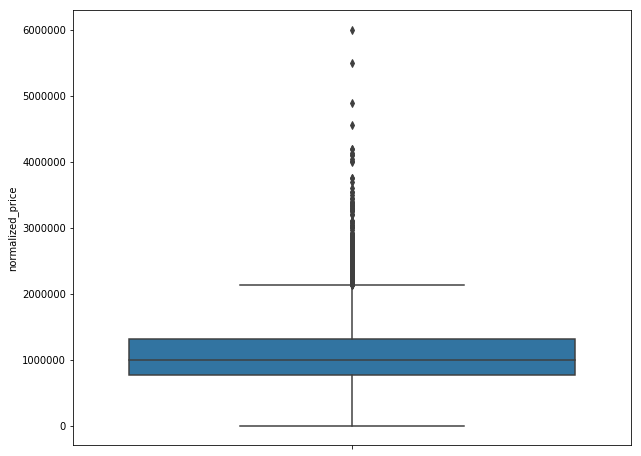

In [485]:
import seaborn as sns
sns.boxplot(y=df_sold_single_family['normalized_price'])

In [486]:
df_sold_single_family[df_sold_single_family['normalized_price']>5000000]

,latitude,longitude,address,city,state,zip,bedrooms,bathrooms,sqft,lot_size,...,house_type,url,Parcel_Number,Liquefaction,Landslide,Faultzone,fire_hazard,normalized_price,normalized_diff,normalized_perc
7595,37.217259,-121.819718,20784 VIA CORTA,SAN JOSE,CA,95120,4.0,3.0,2719.0,566280.0,...,single_family,http://www.zillow.com/homes/recently_sold//hom...,70127056,0.0,1.0,0,0,5500000.0,205961.0,3.890432
9189,37.256237,-121.792084,5855 SILVER CREEK VALLEY RD,SAN JOSE,CA,95138,0.0,NaN,NaN,NaN,...,single_family,http://www.zillow.com/homes/recently_sold//hom...,67807045,1.0,0.0,0,0,6000000.0,99999999.0,NaN


In [487]:
# dropping bad data
df_sold_single_family = df_sold_single_family.drop(df_sold_single_family[df_sold_single_family['address']=='5855 SILVER CREEK VALLEY RD'].index)


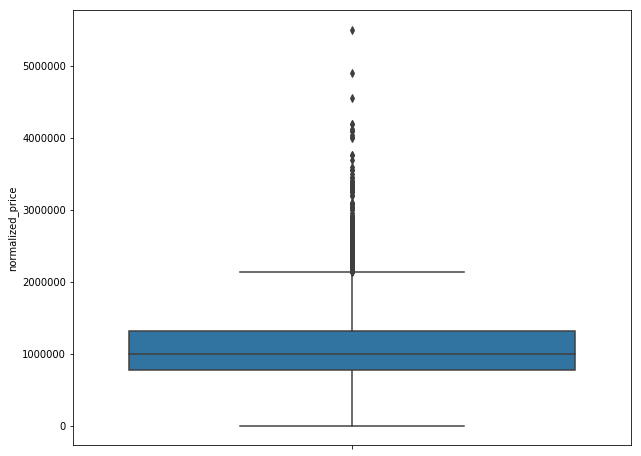

In [488]:
sns.boxplot(y=df_sold_single_family['normalized_price'])

In [489]:
#df_sold_single_family[df_sold_single_family['price']<50000]

In [490]:
#df_sold_single_family_tes=df_sold_single_family.drop(df_sold_single_family[df_sold_single_family['price']<50000].index)



In [491]:
df_sold_single_family = df_sold_single_family.drop(df_sold_single_family[(df_sold_single_family.address == '671 WASHINGTON ST')].index)


In [492]:
df_sold_single_family_tes['normalized_price'].describe()

count    1.096700e+04
mean     1.075104e+06
std      4.880121e+05
min      5.000000e+04
25%      7.780500e+05
50%      1.000000e+06
75%      1.320000e+06
max      5.500000e+06
Name: normalized_price, dtype: float64

In [493]:
df_sold_single_family.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11050 entries, 9 to 13560
Data columns (total 26 columns):
latitude            11050 non-null float64
longitude           11050 non-null float64
address             11050 non-null object
city                11050 non-null object
state               11050 non-null object
zip                 11050 non-null int64
bedrooms            11045 non-null float64
bathrooms           10997 non-null float64
sqft                11016 non-null float64
lot_size            11017 non-null float64
year_built          11007 non-null float64
price               11050 non-null float64
sale_type           11050 non-null object
zestimate           11038 non-null float64
date_sold           11050 non-null datetime64[ns]
days_on_zillow      73 non-null float64
house_type          11050 non-null object
url                 11050 non-null object
Parcel_Number       11050 non-null int64
Liquefaction        11050 non-null float64
Landslide           11050 non-null fl

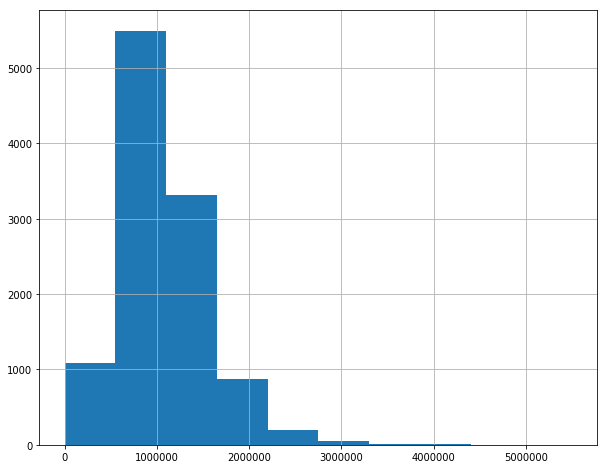

In [494]:
df_sold_single_family.normalized_price.hist()

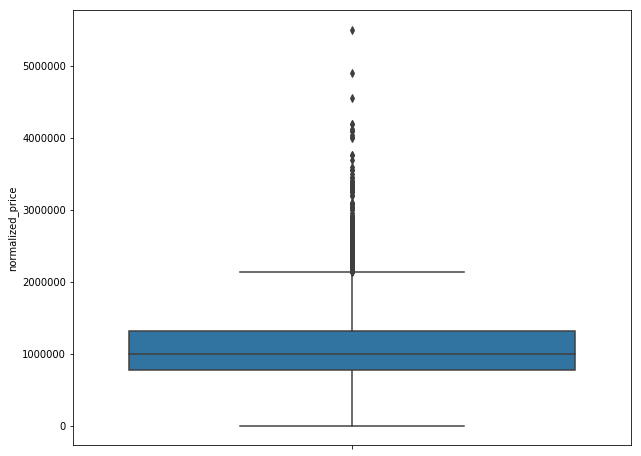

In [495]:
import seaborn as sns
sns.boxplot(y=df_sold_single_family['normalized_price'])

In [496]:
df_sold_single_family.shape

(11050, 26)

(array([ 607.,  690., 1181.,  914.,  657.,  480.,  476.,  412.,  358.,
         324.,  318.,  282.,  266.,  226.,  226.,  219.,  204.,  169.,
         150.,  148.,  130.,  113.,  101.,  103.,   76.,   75.,   79.,
          51.,   35.,   51.,   38.,   33.,   46.,   30.,   37.,   24.,
          30.,   21.,   21.,   18.,   16.,   18.,   12.,   15.,    8.,
          10.,    8.,   22.,   12.,   16.,    9.,   12.,   11.,    7.,
           6.,   18.,   13.,   10.,   15.,   12.,   12.,   14.,   12.,
          20.,   15.,   14.,   20.,   17.,   20.,   26.,   18.,   16.,
          28.,   22.,   30.,   32.,   23.,   19.,   15.,   24.,   35.,
          26.,   23.,   23.,   20.,   11.,   18.,   17.,   16.,   16.,
           8.,   13.,   12.,    7.,    9.,   13.,   13.,    7.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 

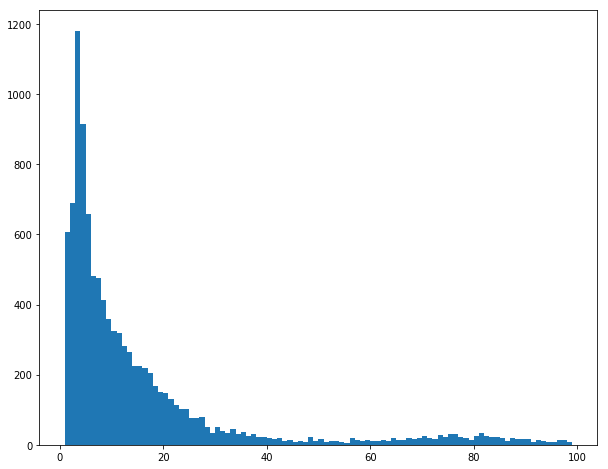

In [497]:
plt.hist(df_sold_single_family['normalized_perc'], bins=range(1, 100))


In [498]:
df_sold_single_family = df_sold_single_family.drop(df_sold_single_family[(df_sold_single_family.normalized_perc >= 38)].index)
df_sold_single_family.shape                                                                         


(9986, 26)

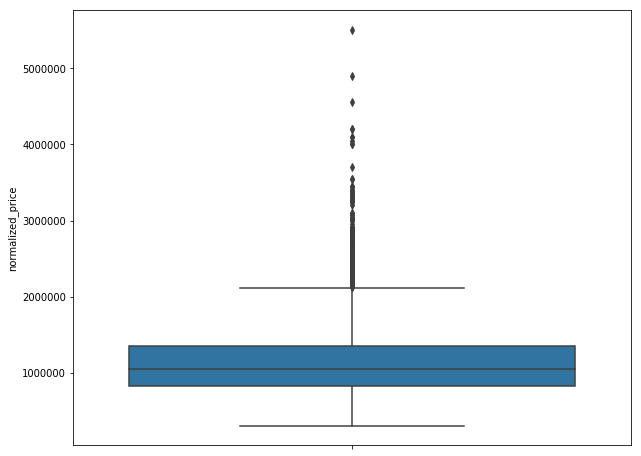

In [499]:
import seaborn as sns
sns.boxplot(y=df_sold_single_family['normalized_price'])

In [500]:
df_sold_single_family['normalized_price'].describe()

count    9.986000e+03
mean     1.139468e+06
std      4.370662e+05
min      3.100000e+05
25%      8.319000e+05
50%      1.050000e+06
75%      1.350000e+06
max      5.500000e+06
Name: normalized_price, dtype: float64

In [501]:
df_sold_single_family.to_csv(r'/Users/hp/Projects/zillow/Zillow/single_family_sold_normalized_price_outlier_removed.csv')


In [502]:
import math
normalized_price_list_th = []
normalized_diff_list_th = []
normalized_perc_list_th = []
for index, row in data_townhouse_sold.iterrows():
    price = row['price']
    zestimate = row['zestimate']
    date_sold = str(row['date_sold'])
    new_price = price
    if len(date_sold.split('-')) > 1:
        mm,dd,yy = date_sold.split('-')
        if yy == '2016':
            if mm == '1' or mm == '2' or mm == '3':
                new_price = new_price + (new_price * 0.23)
            if mm == '4' or mm == '5' or mm == '6':
                new_price = new_price + (new_price * 0.10)
            if mm == '7' or mm == '8' or mm == '9':
                new_price = new_price + (new_price * 0.20)
            if mm == '10' or mm == '11' or mm == '12':
                new_price = new_price + (new_price * 0.17)
        if yy == '2017':
            if mm == '1' or mm == '2' or mm == '3':
                new_price = new_price + (new_price * 0.10)
            if mm == '4' or mm == '5' or mm == '6':
                new_price = new_price + (new_price * 0.05)
            if mm == '7' or mm == '8' or mm == '9':
                new_price = new_price + (new_price * 0.07)
            if mm == '10' or mm == '11' or mm == '12':
                new_price = new_price + (new_price * -0.05)
        if yy == '2018':
            if mm == '1' or mm == '2' or mm == '3':
                new_price = new_price + (new_price * -0.12)
            if mm == '4' or mm == '5' or mm == '6':
                new_price = new_price + (new_price * -0.20)
            if mm == '7' or mm == '8' or mm == '9':
                new_price = new_price + (new_price * -0.12)
            if mm == '10' or mm == '11' or mm == '12':
                new_price = new_price + (new_price * -0.06)
    normalized_price_list_th.append(float(new_price))
    # calculate diff
    if math.isnan(zestimate):
        normalized_diff = float(99999999)
    else:
        normalized_diff = float(abs(zestimate-new_price))
    normalized_diff_list_th.append(normalized_diff)
    normalized_perc = (normalized_diff/zestimate)*100
    normalized_perc_list_th.append(normalized_perc)


data_townhouse_sold['normalized_price'] = normalized_price_list_th
data_townhouse_sold['normalized_diff'] = normalized_diff_list_th
data_townhouse_sold['normalized_perc'] = normalized_perc_list_th


/Users/hp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/hp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/hp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

In [503]:
data_townhouse_sold.to_csv(r'/Users/hp/Projects/zillow/Zillow/townhouse_sold_normalized_price.csv')
df_sold_townhouse = data_townhouse_sold
df_sold_townhouse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2041 entries, 0 to 13558
Data columns (total 26 columns):
latitude            2041 non-null float64
longitude           2041 non-null float64
address             2041 non-null object
city                2041 non-null object
state               2041 non-null object
zip                 2041 non-null int64
bedrooms            2041 non-null float64
bathrooms           2040 non-null float64
sqft                2040 non-null float64
lot_size            2021 non-null float64
year_built          2033 non-null float64
price               2041 non-null float64
sale_type           2041 non-null object
zestimate           2037 non-null float64
date_sold           2041 non-null datetime64[ns]
days_on_zillow      2 non-null float64
house_type          2041 non-null object
url                 2041 non-null object
Parcel_Number       2041 non-null int64
Liquefaction        2041 non-null float64
Landslide           2041 non-null float64
Faultzone       

In [504]:
df_sold_townhouse[df_sold_townhouse['normalized_price']>1000000]

,latitude,longitude,address,city,state,zip,bedrooms,bathrooms,sqft,lot_size,...,house_type,url,Parcel_Number,Liquefaction,Landslide,Faultzone,fire_hazard,normalized_price,normalized_diff,normalized_perc
579,37.321068,-121.985902,4656 CORRIDA CIR,SAN JOSE,CA,95129,2.0,2.0,1350.0,3920.0,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,29644013,0.0,0.0,0,0,1010000.0,191127.0,15.912306
600,37.415469,-121.960342,4260 BALLATORE DR,SAN JOSE,CA,95134,3.0,3.0,1405.0,871.0,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,9772037,1.0,0.0,0,0,1010000.0,138017.0,12.022209
601,37.317567,-121.980325,4440 JUNIPERO SERRA LN,SAN JOSE,CA,95129,3.0,2.5,1429.0,2265.0,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,38156029,0.0,0.0,0,0,1010000.0,223989.0,18.151620
608,37.403855,-121.922688,419 CAMILLE CIR UNIT 12,SAN JOSE,CA,95134,3.0,2.5,1710.0,1306.0,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,9759083,1.0,0.0,0,0,1010000.0,136951.0,11.940440
610,37.312839,-121.891304,1120 KAYELLEN CT,SAN JOSE,CA,95125,3.0,3.0,1780.0,1611.0,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,43441005,1.0,0.0,0,0,1010000.0,20451.0,2.066699
613,37.243491,-121.796129,509 AUTUMN MEADOW DR,SAN JOSE,CA,95123,3.0,4.0,2093.0,1166.0,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,70648003,1.0,0.0,0,0,1010000.0,32093.0,3.079668
618,37.316692,-121.986100,4793 RASPBERRY PL,SAN JOSE,CA,95129,4.0,2.5,1408.0,1393.0,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,38154031,0.0,0.0,0,0,1010000.0,223814.0,18.140011
637,37.382884,-121.889867,1561 TAINAN DR,SAN JOSE,CA,95131,4.0,3.0,2009.0,3092.0,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,24139064,1.0,0.0,0,0,1010000.0,240388.0,19.225073
653,37.349237,-121.891012,335 CEREZA PL,SAN JOSE,CA,95112,2.0,3.0,1620.0,701.0,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,24976059,1.0,0.0,0,0,1020000.0,21654.0,2.168988
654,37.349699,-121.891382,511 MARIANI LN,SAN JOSE,CA,95112,2.0,2.5,1620.0,701.0,...,townhouse,http://www.zillow.com/homes/recently_sold//hom...,24976029,1.0,0.0,0,0,1020000.0,22480.0,2.253589


In [505]:
#df_sold_townhouse=df_sold_townhouse.drop(df_sold_townhouse[df_sold_townhouse['normalized_price']<200000].index)


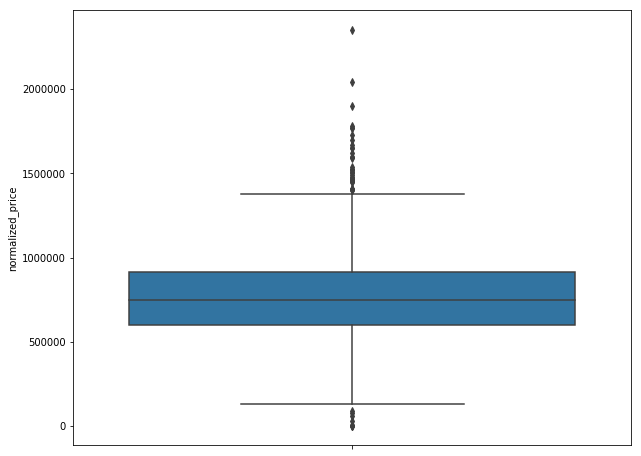

In [506]:
import seaborn as sns
sns.boxplot(y=df_sold_townhouse['normalized_price'])

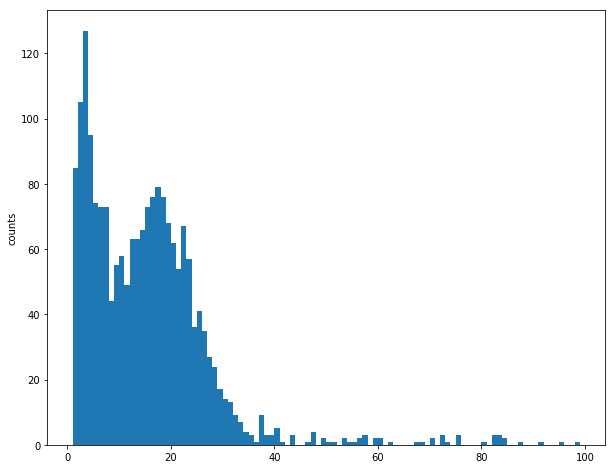

In [507]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.hist(df_sold_townhouse['normalized_perc'], bins=range(1, 100))
plt.ylabel('counts')
plt.show()


In [508]:
df_sold_townhouse['normalized_price'].describe()

count    2.041000e+03
mean     7.741802e+05
std      2.581341e+05
min      2.950000e+03
25%      6.000000e+05
50%      7.500000e+05
75%      9.170000e+05
max      2.350000e+06
Name: normalized_price, dtype: float64

In [509]:
df_sold_townhouse = df_sold_townhouse.drop(df_sold_townhouse[(df_sold_townhouse.normalized_perc >= 38)].index)
df_sold_townhouse['normalized_price'].describe()                                                                         


count    1.974000e+03
mean     7.844454e+05
std      2.442740e+05
min      2.950000e+05
25%      6.126250e+05
50%      7.550000e+05
75%      9.200000e+05
max      2.040000e+06
Name: normalized_price, dtype: float64

In [510]:
df_sold_townhouse.to_csv(r'/Users/hp/Projects/zillow/Zillow/townhouse_sold_normalized_price_outlier_removed.csv')
